## <h1><center> Python Notebook </center></h1>

Some basic items


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [10]:
# Load all avalible data

df_calandars = pd.read_csv('data/calendar_afcs2022.csv')
df_sales_train = pd.read_csv('data/sales_train_validation_afcs2022.csv')
df_sales_test = pd.read_csv('data/sales_test_validation_afcs2022.csv')
df_sample_sub = pd.read_csv('data/sample_submission_afcs2022.csv')
df_sell_prices = pd.read_csv('data/sell_prices_afcs2022.csv')

df_sales_train

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,...,0,0,0,0,2,0,0,5,2,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,...,0,4,2,1,1,0,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,2,0,2
819,FOODS_3_824_TX_3_validation,0,1,0,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
820,FOODS_3_825_TX_3_validation,0,0,0,2,1,1,0,0,1,...,1,1,1,3,1,0,0,4,2,0
821,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,2,1,1,5,3,1,2,1,2


In [70]:
# Get all dates 

mondates = df_calandars[df_calandars['weekday'] == 'Monday']['date'].unique()
tuesdates = df_calandars[df_calandars['weekday'] == 'Tuesday']['date'].unique()
wednesdates = df_calandars[df_calandars['weekday'] == 'Wednesday']['date'].unique()
thursdates = df_calandars[df_calandars['weekday'] == 'Thursday']['date'].unique()
fridates = df_calandars[df_calandars['weekday'] == 'Friday']['date'].unique()
saturdates = df_calandars[df_calandars['weekday'] == 'Saturday']['date'].unique()
sundates = df_calandars[df_calandars['weekday'] == 'Sunday']['date'].unique()

string_dates = [mondates, tuesdates, wednesdates, thursdates, fridates, saturdates, sundates]


# Makes a string date into a datetime object
def get_datetime(string_date):
    l = string_date.split('/')
    return dt.datetime(int(l[2]), int(l[0]), int(l[1]))


# Gets the amount of days between the start date of the data and the given date
def get_dateindex(string_date):
    
    start_date = dt.datetime(2011, 1 ,29)
    end_date = get_datetime(string_date)
    
    return (end_date - start_date).days + 1

# Creates a 2d array of string indices to use as column names in the sales train_df
def get_string_indices(string_dates):
    string_indices = []

    for i, day in enumerate(string_dates):

        string_indices.append([])

        for s in day:
            num_index = get_dateindex(s)
            string_index = f'd_{num_index}'
            string_indices[i].append(string_index)

    return string_indices

# Gets the total amount of sales per weekday
def get_sales_by_day(string_dates):
    string_indices = get_string_indices(string_dates)
    
    tot_sales = []
    
    for i in range(len(string_indices)):
        tot_sales.append(df_sales_train[string_indices[i][:-8]].sum().sum())
        
    return tot_sales
    
string_indices = get_string_indices(string_dates)

<function matplotlib.pyplot.show(close=None, block=None)>

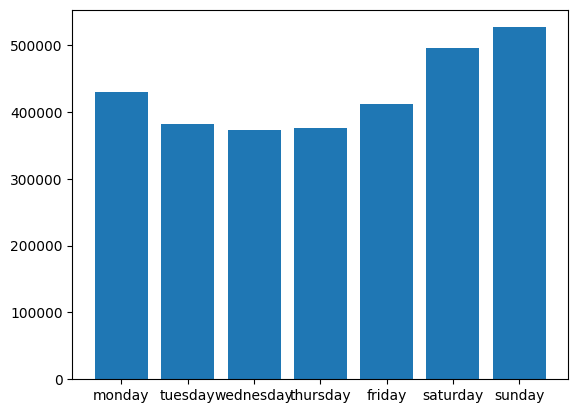

In [71]:

day_sales = get_sales_by_day(string_dates)
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

plt.bar(days, day_sales)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

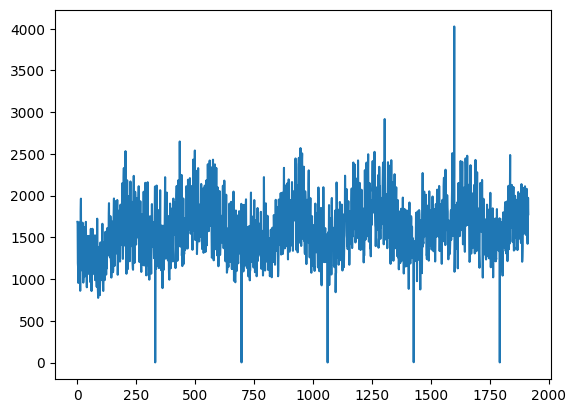

In [4]:
# Plotting the complete food sales per day

df_sales_train

food_sales = []
for column in df_sales_train.columns[1:]:
    food_sales.append(df_sales_train[column].sum())
    
x = np.linspace(1, len(food_sales), len(food_sales))
plt.plot(x, food_sales)
plt.show

In [16]:
df_sample_sub

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_3_001_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FOODS_3_005_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
819,FOODS_3_824_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
820,FOODS_3_825_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
821,FOODS_3_826_TX_3_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
